**Project Background:**
Nile is the Brazilian large eCommerce platform, eager to develop and deploy the model to predict and incentivise customers for leaving positive reviews in an efficient way.

**Project Goal:** To complete the pipeline for generating the prediction model, process includes data cleaning, merging, modelling, and fine-tuning hyperparameter.


1.   Data Cleaning: Handle duplicates, missing values, and invalid entries
2.   Merging: Combine datasets into a single, consistent dataset
3.   Modelling: Build and evaluate a model to predict review scores
4.   Fine-tuning hyperparameter: Improve the model's classification performance, without bias toward class distribution




# **1. Data Cleaning**
In this notebook, the data cleaning steps are performed on the dataset provided by Neil. However, two of the datasets are excluded due to the lack of correlation and insufficient direct linkage to positive reviews.

- **olist_geolocation_dataset**: Contains geolocation information about customers and sellers, which is excluded from the current analysis.
- **olist_sellers_dataset**: Contains details about the sellers, which has not been included in this dataset.

The data cleaning process is applied only to the primary dataset, which includes customer, order_reviews, orders, order_item, order_payments, and products.

In [1]:
# Load the uploaded CSV file

import pandas as pd
customers_df = pd.read_csv("olist_customers_dataset.csv")
items_df = pd.read_csv("olist_order_items_dataset.csv")
payments_df = pd.read_csv("olist_order_payments_dataset.csv")
reviews_df = pd.read_csv("olist_order_reviews_dataset.csv")
orders_df = pd.read_csv("olist_orders_dataset.csv")
products_df = pd.read_csv("olist_products_dataset.csv")

**1.2 Clean 'olist_customers_dataset'**

In [2]:
# Display basic information about the dataset
data_quality_report = {
    "Shape": customers_df.shape,
    "Columns": list(customers_df.columns),
    "Data Types": customers_df.dtypes,
    "Missing Values": customers_df.isnull().sum(),
    "Duplicate Rows": customers_df.duplicated().sum()}

print("Data Quality Report:")
print(data_quality_report)

# Cleaning Steps

# 1. Remove duplicates (just in case)
cleaned_customers_df = customers_df.drop_duplicates()

# 2. Standardize data types - already standardized

# 3. Handle Missing Data (No missing data)

# 4. Check uniqueness of customer_id and customer_unique_id
customer_id_check = cleaned_customers_df['customer_id'].is_unique
customer_unique_id_check = cleaned_customers_df['customer_unique_id'].is_unique

print(customer_id_check)
print(customer_unique_id_check)

Data Quality Report:
{'Shape': (99441, 5), 'Columns': ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state'], 'Data Types': customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object, 'Missing Values': customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64, 'Duplicate Rows': 0}
True
False


**1.3 Clean 'olist_order_payments_dataset'**

In [3]:
# Display basic information about the dataset
data_quality_report = {
    "Shape": payments_df.shape,
    "Columns": list(payments_df.columns),
    "Data Types": payments_df.dtypes,
    "Missing Values": payments_df.isnull().sum(),
    "Duplicate Rows": payments_df.duplicated().sum()}

print("Data Quality Report:")
print(data_quality_report)

# Remove duplicate rows based on 'order_id', keeping only the first occurrence
# This approach simplifies the data structure while ensuring that every order is uniquely represented in the dataset.
payments_df = payments_df.drop_duplicates(subset='order_id', keep='first')

# Remove rows with missing values
payments_df = payments_df.dropna()

# Verify the cleaned data
print("Rows after cleaning:", payments_df.shape[0])
print("Remaining duplicates:", payments_df.duplicated(subset='order_id').sum())
print(payments_df.isnull().sum())

Data Quality Report:
{'Shape': (103886, 5), 'Columns': ['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value'], 'Data Types': order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object, 'Missing Values': order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64, 'Duplicate Rows': 0}
Rows after cleaning: 99440
Remaining duplicates: 0
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


**1.4 Clean 'olist_order_reviews_dataset'**

In [4]:
# Display basic information about the dataset
data_quality_report = {
    "Shape": reviews_df.shape,
    "Columns": list(reviews_df.columns),
    "Data Types": reviews_df.dtypes.to_dict(),
    "Missing Values": reviews_df.isnull().sum().to_dict(),
    "Duplicate Rows": reviews_df.duplicated().sum()
}

print("Data Quality Report:")
print(data_quality_report)

# Check if there are any zeros in the review_score column
zero_review_score_count = (reviews_df['review_score'] == 0).sum()
print(zero_review_score_count)

# Cleaning the data

# 1. Handle Missing Data (No missing data)

# 2. Check for duplicates in the 'review_id' column
if 'review_id' in reviews_df.columns:
    duplicate_review_ids = reviews_df['review_id'].duplicated().sum()
    print(f"Duplicate review IDs: {duplicate_review_ids}")

    # Remove duplicates, keeping only the first occurrence
    # This approach simplifies the data structure while ensuring that every order is uniquely represented in the dataset.
    if duplicate_review_ids > 0:
        reviews_df = reviews_df.drop_duplicates(subset='review_id', keep='first')
        print(f"Duplicates removed.")
else:
    print("The column 'review_id' does not exist in the dataset.")

# 3. Convert to datetime format
reviews_df['review_creation_date'] = pd.to_datetime(reviews_df['review_creation_date'], errors='coerce')
reviews_df['review_answer_timestamp'] = pd.to_datetime(reviews_df['review_answer_timestamp'], errors='coerce')

print(reviews_df[['review_creation_date', 'review_answer_timestamp']].dtypes)

Data Quality Report:
{'Shape': (89999, 7), 'Columns': ['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp'], 'Data Types': {'review_id': dtype('O'), 'order_id': dtype('O'), 'review_score': dtype('int64'), 'review_comment_title': dtype('O'), 'review_comment_message': dtype('O'), 'review_creation_date': dtype('O'), 'review_answer_timestamp': dtype('O')}, 'Missing Values': {'review_id': 0, 'order_id': 0, 'review_score': 0, 'review_comment_title': 79404, 'review_comment_message': 52429, 'review_creation_date': 0, 'review_answer_timestamp': 0}, 'Duplicate Rows': 0}
0
Duplicate review IDs: 677
Duplicates removed.


<ipython-input-4-396ef0ad7aa6>:35: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  reviews_df['review_creation_date'] = pd.to_datetime(reviews_df['review_creation_date'], errors='coerce')
<ipython-input-4-396ef0ad7aa6>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df['review_creation_date'] = pd.to_datetime(reviews_df['review_creation_date'], errors='coerce')
<ipython-input-4-396ef0ad7aa6>:36: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  reviews_df['review_answer_timestamp'] = pd.to_datetime(re

review_creation_date       datetime64[ns]
review_answer_timestamp    datetime64[ns]
dtype: object


**1.5 Clean 'olist_orders_dataset'**

In [5]:
# Check for empty values in each column
empty_values = orders_df.isnull().sum()
print(empty_values)

#Remove rows with any empty values
orders_df.dropna(axis=0, inplace=True)

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [7]:
#Display the data types of each column
print(orders_df.dtypes)

orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S')
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'], format='%Y-%m-%d %H:%M:%S')
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'], format='%Y-%m-%d', errors='coerce')

orders_df

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,NaT
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,NaT
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,NaT
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,NaT
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,NaT
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,NaT
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,NaT
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,NaT
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,NaT


In [8]:
# Remove invalid rows based on date conditions, as these deviations obey the common sense, which will impact the accuracy of positive reviews.
orders_df = orders_df[
    ~(orders_df['order_delivered_customer_date'] < orders_df['order_delivered_carrier_date']) &
    ~(orders_df['order_delivered_carrier_date'] < orders_df['order_purchase_timestamp']) &
    ~(orders_df['order_delivered_carrier_date'] < orders_df['order_approved_at'])
]

# Remove rows where order status is 'cancelled'
orders_df = orders_df[orders_df['order_status'] != 'canceled']

print(orders_df)

                               order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp   order_approved_at  \
0       

In [9]:
result = orders_df[orders_df['order_delivered_carrier_date'] < orders_df['order_approved_at']]
print(result)

Empty DataFrame
Columns: [order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date]
Index: []


In [10]:
# Ensure the format is datetime
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'], errors='coerce')
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'], errors='coerce')

# Calculate the time differenciation
orders_df['time_difference'] = orders_df['order_approved_at'] - orders_df['order_purchase_timestamp']

# Set the threshold which is greater than 1 day for large gap
large_gap_threshold = pd.Timedelta(days=1)

# Filter the value which is greater than large gap
large_gaps = orders_df[orders_df['time_difference'] > large_gap_threshold]

print(large_gaps)


                               order_id                       customer_id  \
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
8      76c6e866289321a7c93b82b54852dc33  f54a9f0e6b351c431402b8461ea51999   
12     82566a660a982b15fb86e904c8d32918  d3e3b74c766bc6214e0c830b17ee2341   
25     fbf9ac61453ac646ce8ad9783d7d0af6  3a874b4d4c4b6543206ff5d89287f0c3   
26     acce194856392f074dbf9dada14d8d82  7e20bf5ca92da68200643bda76c504c6   
...                                 ...                               ...   
99391  e8455c3c0bc5471436a335a0de392761  3a4562b466aea32a6aa09fe85e67d400   
99392  33baefa752f2d98a008d4330d306d3db  8b764335e86e1a8f8d3db9f119e03a79   
99401  add4f182072426430ee6c993eab97efe  b87639f5efd3e2316dca5dec5e2f88f4   
99410  71c4b7b8844a031b7db8ca41c41d4aae  dce0014426964924f9564758e4fadcbf   
99423  38e9133ce29f6bbe35aed9c3863dce01  ad312389a098ceff46ce92c4595c06d0   

      order_status order_purchase_timestamp   order_approved_at  \
1       

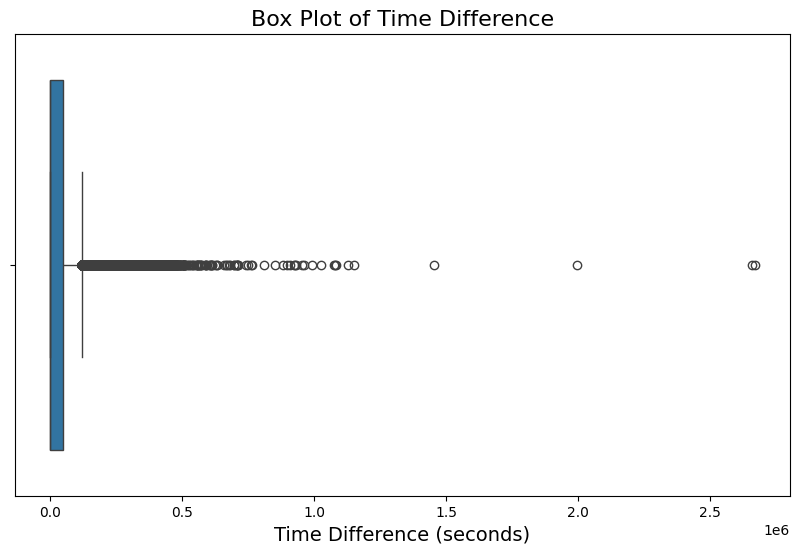

In [11]:
# Check the outliers within time difference, extreme outlier would impact modelling accuracy.

import matplotlib.pyplot as plt
import seaborn as sns

# Convert time_difference to total seconds (or another numeric representation) if needed
orders_df['time_difference_seconds'] = orders_df['time_difference'].dt.total_seconds()
orders_df = orders_df.dropna(subset=['time_difference_seconds'])

orders_df['time_difference_seconds'] = pd.to_numeric(orders_df['time_difference_seconds'], errors='coerce')

# Create a box plot, to check the outlier
plt.figure(figsize=(10, 6))
sns.boxplot(x=orders_df['time_difference_seconds'])

# Customize the plot
plt.title('Box Plot of Time Difference', fontsize=16)
plt.xlabel('Time Difference (seconds)', fontsize=14)
plt.show()

In [12]:
import pandas as pd

# Assuming your data is in a pandas DataFrame named 'df' and the column of interest is 'TimeDifference'
column = 'time_difference_seconds'

# Sort the data by the column to identify the largest values
sorted_df = orders_df.sort_values(by=column, ascending=False)

# Remove the last 4 largest values
filtered_df = sorted_df.iloc[4:]

print(f"Original data size: {len(orders_df)}")
print(f"Filtered data size: {len(filtered_df)}")

Original data size: 95082
Filtered data size: 95078


In [13]:
columns_to_remove = ["time_difference", "time_difference_seconds"]
orders_df = orders_df.drop(columns=columns_to_remove)

**1.6 Clean 'olist_products_dataset' & 'olist_order_items_dataset'**



In [14]:
from itertools import product
# Display basic information about the dataset
data_quality_report = {
    "Shape": products_df.shape,
    "Columns": list(products_df.columns),
    "Data Types": products_df.dtypes.to_dict(),
    "Missing Values": products_df.isnull().sum().to_dict(),
    "Duplicate Rows": products_df.duplicated().sum()}

print("Data Quality Report:")
print(data_quality_report)

Data Quality Report:
{'Shape': (32951, 10), 'Columns': ['product_id', 'product_category_name', 'product_category_name_translate', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'], 'Data Types': {'product_id': dtype('O'), 'product_category_name': dtype('O'), 'product_category_name_translate': dtype('O'), 'product_name_lenght': dtype('float64'), 'product_description_lenght': dtype('float64'), 'product_photos_qty': dtype('float64'), 'product_weight_g': dtype('float64'), 'product_length_cm': dtype('float64'), 'product_height_cm': dtype('float64'), 'product_width_cm': dtype('float64')}, 'Missing Values': {'product_id': 0, 'product_category_name': 610, 'product_category_name_translate': 610, 'product_name_lenght': 610, 'product_description_lenght': 610, 'product_photos_qty': 610, 'product_weight_g': 2, 'product_length_cm': 2, 'product_height_cm': 2, 'product_width_cm': 2}, 'Duplicate R

**Findings:**

1. Total have 610 missing values in product_category_name. However, product_category_name is the important index to identify customer's preference. Therefore, use JOIN function to merge with order_items and order_reviews.
2. The expected outcome is to clarify whether the NA value in product_category_name should be removed.
3. If the three columns (including product_category_name, order_id, and review_score) all come up with NA value, then that of product_category_name with NA value can be removed. Due to these data do not provide review score, so those data are unapplicable.

In [15]:
# Merge order_items with order_reviews
merged_df_reviews = pd.merge(items_df, reviews_df, on='order_id', how='left')

# Merge the result with products
final_merged_df = pd.merge(merged_df_reviews, products_df, on='product_id', how='left')

# Filter rows where both review_score and product_category_name are NaN
na_combined = final_merged_df[(final_merged_df['review_score'].isna()) &
                              (final_merged_df['product_category_name'].isna())]

# Display the result
print(na_combined[['order_id', 'review_score', 'product_category_name']])

                                order_id  review_score product_category_name
126     00482f2670787292280e0a8153d82467           NaN                   NaN
805     01d72d42aaedb3736840132071d51100           NaN                   NaN
1379    03343a88c4d669e6378c5aedc4147919           NaN                   NaN
3413    07adb4d17fca01935d0590d775e9569f           NaN                   NaN
3548    08003b4e485e934387afc41448692e0a           NaN                   NaN
...                                  ...           ...                   ...
107448  f37ceab35e76b508f951fd148edead7d           NaN                   NaN
107643  f3ec304ba495d76a8dac93719dab77bb           NaN                   NaN
108078  f4ec40aeb45f082c239a842530a96294           NaN                   NaN
108890  f6cc9e6914d9aa4fd5dc1d380ca571a7           NaN                   NaN
110035  f9649c12307baa46d80875cd558b3e36           NaN                   NaN

[177 rows x 3 columns]


**Finding:** There are 177 records of product_category_name can be removed.

In [16]:
# Filter the original products DataFrame to exclude these product_ids
order_items = products_df[~products_df['product_category_name'].isin(na_combined)]

# Display the filtered DataFrame (without the 175 rows)
print(order_items)

# Display column names
print("Column Names:")
print(order_items.columns.tolist())

                             product_id              product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes   
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer   
3      cef67bcfe19066a932b7673e239eb23d                              bebes   
4      9dc1a7de274444849c219cff195d0b71              utilidades_domesticas   
...                                 ...                                ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   
32950  106392145fca363410d287a815be6de4                    cama_mesa_banho   

      product_category_name_translate  product_name_lenght  \
0

Generated cleaned_products_dataset.csv, which removed unrelevant product_category_name

# **2. Data Merging**

To create a comprehensive dataset, multiple tables were merged using the order_reviews table as the primary (left) table. This approach retained all reviews, ensuring that no critical insights were overlooked. The following joins were performed:
1.   Products, Order Items, and Order Reviews
2.   Customers, Orders, and Order Reviews
3.	 Order Payments and Order Reviews



**2.1 Products, Order Items, and Order Reviews:**
The products table was joined to the order_items table via product_id, followed by a merge with the order_reviews table using order_id. This integration enriched the dataset with product details, pricing, and freight costs for each order item.


In [18]:
# Read the cleaned datasets
df_cleaned_customers = pd.read_csv('cleaned_customers_dataset.csv')
df_cleaned_geolocation = pd.read_csv('cleaned_olist_geolocation_dataset.csv')
df_cleaned_orders = pd.read_csv('cleaned_olist_orders_dataset.csv')
df_cleaned_sellers = pd.read_csv('cleaned_olist_sellers_dataset.csv')
df_cleaned_order_reviews = pd.read_csv('cleaned_order_reviews_dataset.csv')
df_cleaned_products = pd.read_csv('cleaned_products_dataset.csv')
df_order_items = pd.read_csv('olist_order_items_dataset.csv')
df_order_payments = pd.read_csv('olist_order_payments_dataset.csv')

In [19]:
# Merge products table and order_items table first, linking with product_id
df_products_order_items = pd.merge(df_cleaned_products, df_order_items, on='product_id', how='left')
print(df_products_order_items )
df_products_order_items.to_csv('df_products_order_items.csv', index=False)

                              product_id   product_category_name  \
0       1e9e8ef04dbcff4541ed26657ea517e5              perfumaria   
1       3aa071139cb16b67ca9e5dea641aaa2f                   artes   
2       96bd76ec8810374ed1b65e291975717f           esporte_lazer   
3       cef67bcfe19066a932b7673e239eb23d                   bebes   
4       9dc1a7de274444849c219cff195d0b71   utilidades_domesticas   
...                                  ...                     ...   
112645  83808703fc0706a22e264b9d75f04a2e  informatica_acessorios   
112646  83808703fc0706a22e264b9d75f04a2e  informatica_acessorios   
112647  83808703fc0706a22e264b9d75f04a2e  informatica_acessorios   
112648  83808703fc0706a22e264b9d75f04a2e  informatica_acessorios   
112649  106392145fca363410d287a815be6de4         cama_mesa_banho   

        product_name_lenght  product_description_lenght  product_photos_qty  \
0                      40.0                       287.0                 1.0   
1                      44

In [20]:
# Check if it have duplicates
duplicates_order_id = df_products_order_items.duplicated(subset=['order_id']).sum()
duplicates_product_id = df_products_order_items.duplicated(subset=['product_id']).sum()

print("Number of duplicate customer_id:", duplicates_order_id)
print("Number of duplicate order_id:", duplicates_product_id)

Number of duplicate customer_id: 13984
Number of duplicate order_id: 79699


In [21]:
# Remove duplicates, keeping only the first occurrence
# This approach simplifies the data structure while ensuring that every order is uniquely represented in the dataset.
df_products_order_items.drop_duplicates(subset=['order_id'], keep='first', inplace=True)

print(df_products_order_items)

# # Save to new csv
df_products_order_items.to_csv('df_products_order_items.drop_duplicates.csv', index=False)

                              product_id   product_category_name  \
0       1e9e8ef04dbcff4541ed26657ea517e5              perfumaria   
1       3aa071139cb16b67ca9e5dea641aaa2f                   artes   
2       96bd76ec8810374ed1b65e291975717f           esporte_lazer   
3       cef67bcfe19066a932b7673e239eb23d                   bebes   
4       9dc1a7de274444849c219cff195d0b71   utilidades_domesticas   
...                                  ...                     ...   
112641  9a7c6041fa9592d9d9ef6cfe62a71f8c         cama_mesa_banho   
112642  83808703fc0706a22e264b9d75f04a2e  informatica_acessorios   
112644  83808703fc0706a22e264b9d75f04a2e  informatica_acessorios   
112646  83808703fc0706a22e264b9d75f04a2e  informatica_acessorios   
112649  106392145fca363410d287a815be6de4         cama_mesa_banho   

        product_name_lenght  product_description_lenght  product_photos_qty  \
0                      40.0                       287.0                 1.0   
1                      44

In [22]:
# Read the file
df_products_order_items.drop_duplicates = pd.read_csv('df_products_order_items.drop_duplicates.csv')
df_cleaned_order_reviews = pd.read_csv('cleaned_order_reviews_dataset.csv')

In [23]:
# Merge order_review table and customer_orders.drop table, linking with order_id
df_products_ordersitems_reviews = pd.merge(df_cleaned_order_reviews, df_products_order_items, on='order_id', how='left')
print(df_products_ordersitems_reviews)
df_products_ordersitems_reviews.to_csv('df_products_ordersitems_reviews.drop_duplicates.csv', index=False)

                              review_id                          order_id  \
0      97ca439bc427b48bc1cd7177abe71365  00010242fe8c5a6d1ba2dd792cb16214   
1      7b07bacd811c4117b742569b04ce3580  00018f77f2f0320c557190d7a144bdd3   
2      0c5b33dea94867d1ac402749e5438e8b  000229ec398224ef6ca0657da4fc703e   
3      f4028d019cb58564807486a6aaf33817  00024acbcdf0a6daa1e931b038114c75   
4      940144190dcba6351888cafa43f3a3a5  00042b26cf59d7ce69dfabb4e55b4fd9   
...                                 ...                               ...   
89547  9185f849f32d82e216a4e025e0c50f5c  fffc94f6ce00a00581880bf54a75a037   
89548  be803f6a93d64719fd685c1cc610918a  fffcd46ef2263f404302a634eb57f7eb   
89549  dbdd81cd59a1a9f94a10a990b4d48dce  fffce4705a9662cd70adb13d4a31832d   
89550  fba117c9ac40d41ca7be54741f471303  fffe18544ffabc95dfada21779c9644f   
89551  b2700869a37f1aafc9dda829dc2f9027  fffe41c64501cc87c801fd61db3f6244   

       review_score review_comment_title  \
0                 5            

**2.2 Customers, Orders, and Order Reviews:**
The customer's table was linked to the orders table via customer_id and then merged with order_reviews using order_id. This process provided customer demographic information and order-specific details, such as timestamps and statuses, to facilitate behavioural analysis. Records with missing customer_id values in the order_id field were removed. The customer_id serves as a crucial key for linking orders to customer demographic information. Without this linkage, such records cannot contribute to customer-level analysis or modelling objectives, which focus on predicting and targeting customers likely to leave positive reviews.


In [24]:
# Merge customers table and orders table first, linking with customer_id
df_customers_orders = pd.merge(df_cleaned_customers, df_cleaned_orders, on='customer_id', how='left')
print(df_customers_orders)
df_customers_orders.to_csv('df_customers_orders.csv', index=False)

                            customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

       customer_zip_code_prefix          customer_city customer_state  \
0 

In [25]:
# Check if it have duplicates
duplicates_customer_id = df_customers_orders.duplicated(subset=['customer_id']).sum()
duplicates_customer_unique_id = df_customers_orders.duplicated(subset=['customer_unique_id']).sum()
duplicates_order_id = df_customers_orders.duplicated(subset=['order_id']).sum()

print("Number of duplicate customer_id:", duplicates_customer_id)
print("Number of duplicate customer_unique_id:", duplicates_customer_unique_id)
print("Number of duplicate order_id:", duplicates_order_id)

Number of duplicate customer_id: 0
Number of duplicate customer_unique_id: 3345
Number of duplicate order_id: 4358


In [26]:
# Remove duplicates, keeping only the first occurrence
# This approach simplifies the data structure while ensuring that every order is uniquely represented in the dataset.
df_customers_orders.drop_duplicates(subset=['order_id'], keep='first', inplace=True)

print(df_customers_orders)

# Save to new csv
df_customers_orders.to_csv('df_customers_orders.drop_duplicates.csv', index=False)

                            customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

       customer_zip_code_prefix          customer_city customer_state  \
0 

In [27]:
# Read the file
df_customers_orders.drop_duplicates = pd.read_csv('df_customers_orders.drop_duplicates.csv')
df_cleaned_order_reviews = pd.read_csv('cleaned_order_reviews_dataset.csv')

In [28]:
# Merge order_review table and customer_orders.drop table, linking with order_id
df_customersorders_reviews = pd.merge(df_cleaned_order_reviews, df_customers_orders.drop_duplicates, on='order_id', how='left')
print(df_customersorders_reviews)
df_customersorders_reviews.to_csv('df_customersorders_reviews.csv', index=False)

                              review_id                          order_id  \
0      97ca439bc427b48bc1cd7177abe71365  00010242fe8c5a6d1ba2dd792cb16214   
1      7b07bacd811c4117b742569b04ce3580  00018f77f2f0320c557190d7a144bdd3   
2      0c5b33dea94867d1ac402749e5438e8b  000229ec398224ef6ca0657da4fc703e   
3      f4028d019cb58564807486a6aaf33817  00024acbcdf0a6daa1e931b038114c75   
4      940144190dcba6351888cafa43f3a3a5  00042b26cf59d7ce69dfabb4e55b4fd9   
...                                 ...                               ...   
89547  9185f849f32d82e216a4e025e0c50f5c  fffc94f6ce00a00581880bf54a75a037   
89548  be803f6a93d64719fd685c1cc610918a  fffcd46ef2263f404302a634eb57f7eb   
89549  dbdd81cd59a1a9f94a10a990b4d48dce  fffce4705a9662cd70adb13d4a31832d   
89550  fba117c9ac40d41ca7be54741f471303  fffe18544ffabc95dfada21779c9644f   
89551  b2700869a37f1aafc9dda829dc2f9027  fffe41c64501cc87c801fd61db3f6244   

       review_score review_comment_title  \
0                 5            

**2.3 Order Payments and Order Reviews:**
The order_payments table was merged with order_reviews using order_id. This joins added payment details, such as payment type, and payment values, enhancing the dataset's depth.



In [29]:
# Merge order_payments table and order_reviews table, linking with order_id
df_order_payments_order_reviews = pd.merge(df_order_payments, df_cleaned_order_reviews, on='order_id', how='outer')
print(df_order_payments_order_reviews)
df_order_payments_order_reviews.to_csv('df_order_payments_order_reviews.csv', index=False)

                                order_id  payment_sequential payment_type  \
0       00010242fe8c5a6d1ba2dd792cb16214                 1.0  credit_card   
1       00018f77f2f0320c557190d7a144bdd3                 1.0  credit_card   
2       000229ec398224ef6ca0657da4fc703e                 1.0  credit_card   
3       00024acbcdf0a6daa1e931b038114c75                 1.0  credit_card   
4       00042b26cf59d7ce69dfabb4e55b4fd9                 1.0  credit_card   
...                                  ...                 ...          ...   
103882  fffc94f6ce00a00581880bf54a75a037                 1.0       boleto   
103883  fffcd46ef2263f404302a634eb57f7eb                 1.0       boleto   
103884  fffce4705a9662cd70adb13d4a31832d                 1.0  credit_card   
103885  fffe18544ffabc95dfada21779c9644f                 1.0  credit_card   
103886  fffe41c64501cc87c801fd61db3f6244                 1.0  credit_card   

        payment_installments  payment_value                         review_

In [30]:
# Remove specified columns
columns_to_drop = [
    'review_comment_title',
    'review_comment_message',
    'review_creation_date',
    'review_answer_timestamp',
    'payment_sequential',
    'payment_installments',
    'review_id'
]

dataset = df_order_payments_order_reviews.drop(columns=columns_to_drop)

In [31]:
# Remove rows where 'payment_type' or 'payment_value' has missing values
joined_data = dataset.dropna(subset=['payment_type', 'payment_value'])

# Drop rows with missing 'review_score'
joined_data = dataset.dropna(subset=['review_score'])

In [32]:
# Verify the cleaned data (optional)
print("Number of rows after joining:", joined_data.shape[0])
print("Number of remaining duplicates based on 'order_id':", joined_data.duplicated(subset='order_id').sum())
print("Summary statistics after cleaning:")
print(joined_data.describe())
print(joined_data.isnull().sum())

Number of rows after joining: 93535
Number of remaining duplicates based on 'order_id': 3983
Summary statistics after cleaning:
       payment_value  review_score
count   93534.000000  93535.000000
mean      153.934965      4.071663
std       216.942206      1.359324
min         0.000000      1.000000
25%        56.790000      4.000000
50%       100.000000      5.000000
75%       171.840000      5.000000
max     13664.080000      5.000000
order_id         0
payment_type     1
payment_value    1
review_score     0
dtype: int64


In [33]:
# Save the joined dataset if needed
joined_data.to_csv('joined_reviews_payments_dataset.csv', index=False)

In [34]:
# Check if it have duplicates
duplicates_order_id = joined_data.duplicated(subset=['order_id']).sum()

print("Number of duplicate order_id:", duplicates_order_id)

Number of duplicate order_id: 3983


In [35]:
# Remove duplicates, keeping only the first occurrence
# This approach simplifies the data structure while ensuring that every order is uniquely represented in the dataset.
joined_data.drop_duplicates(subset=['order_id'], keep='first', inplace=True)

print(joined_data)

# Save to new csv
joined_data.to_csv('df_order_payments_order_reviews.drop_duplicates.csv', index=False)

<ipython-input-35-787a9f17a04c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined_data.drop_duplicates(subset=['order_id'], keep='first', inplace=True)


                                order_id payment_type  payment_value  \
0       00010242fe8c5a6d1ba2dd792cb16214  credit_card          72.19   
1       00018f77f2f0320c557190d7a144bdd3  credit_card         259.83   
2       000229ec398224ef6ca0657da4fc703e  credit_card         216.87   
3       00024acbcdf0a6daa1e931b038114c75  credit_card          25.78   
4       00042b26cf59d7ce69dfabb4e55b4fd9  credit_card         218.04   
...                                  ...          ...            ...   
103882  fffc94f6ce00a00581880bf54a75a037       boleto         343.40   
103883  fffcd46ef2263f404302a634eb57f7eb       boleto         386.53   
103884  fffce4705a9662cd70adb13d4a31832d  credit_card         116.85   
103885  fffe18544ffabc95dfada21779c9644f  credit_card          64.71   
103886  fffe41c64501cc87c801fd61db3f6244  credit_card          55.79   

        review_score  
0                5.0  
1                4.0  
2                5.0  
3                4.0  
4                5.0

**2.4 Single Table:** These three enriched datasets were consolidated into a single table using order_id, ensuring the aggregation of all relevant features.


In [36]:
# Read merged datasets
product_order_reviews = pd.read_csv('df_products_ordersitems_reviews.drop_duplicates.csv')
customer_order_reviews = pd.read_csv('df_customersorders_reviews.csv')
order_payments_reviews = pd.read_csv('df_order_payments_order_reviews.drop_duplicates.csv')

<ipython-input-36-b0327959a1db>:2: DtypeWarning: Columns (2,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  product_order_reviews = pd.read_csv('df_products_ordersitems_reviews.drop_duplicates.csv')
<ipython-input-36-b0327959a1db>:3: DtypeWarning: Columns (2,9) have mixed types. Specify dtype option on import or set low_memory=False.
  customer_order_reviews = pd.read_csv('df_customersorders_reviews.csv')


In [37]:
# First merge customer_order with payments
merged_df = pd.merge(product_order_reviews, order_payments_reviews, on='order_id', how='inner')

# Then merge the result with order_items
final_df = pd.merge(customer_order_reviews, merged_df, on='order_id', how='inner')

print(final_df)

                            review_id_x                          order_id  \
0      97ca439bc427b48bc1cd7177abe71365  00010242fe8c5a6d1ba2dd792cb16214   
1      7b07bacd811c4117b742569b04ce3580  00018f77f2f0320c557190d7a144bdd3   
2      0c5b33dea94867d1ac402749e5438e8b  000229ec398224ef6ca0657da4fc703e   
3      f4028d019cb58564807486a6aaf33817  00024acbcdf0a6daa1e931b038114c75   
4      940144190dcba6351888cafa43f3a3a5  00042b26cf59d7ce69dfabb4e55b4fd9   
...                                 ...                               ...   
89547  9185f849f32d82e216a4e025e0c50f5c  fffc94f6ce00a00581880bf54a75a037   
89548  be803f6a93d64719fd685c1cc610918a  fffcd46ef2263f404302a634eb57f7eb   
89549  dbdd81cd59a1a9f94a10a990b4d48dce  fffce4705a9662cd70adb13d4a31832d   
89550  fba117c9ac40d41ca7be54741f471303  fffe18544ffabc95dfada21779c9644f   
89551  b2700869a37f1aafc9dda829dc2f9027  fffe41c64501cc87c801fd61db3f6244   

      review_score review_comment_title_x  \
0                5            

In [38]:
print(final_df.dtypes)
print(final_df.isnull().sum())

review_id_x                       object
order_id                          object
review_score                      object
review_comment_title_x            object
review_comment_message_x          object
review_creation_date_x            object
review_answer_timestamp_x         object
customer_id                       object
customer_unique_id                object
customer_zip_code_prefix          object
customer_city                     object
customer_state                    object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
time_difference                   object
time_difference_seconds          float64
review_id_y                       object
review_score_x                    object
review_comment_title_y            object
review_comment_message_y          object
review_creation_

In [39]:
#drop missing values in the columns.
final_df = final_df.dropna(subset=['customer_unique_id','customer_zip_code_prefix','customer_state','order_status','order_purchase_timestamp',
                                   'order_approved_at','order_delivered_customer_date','order_estimated_delivery_date',
                                   'time_difference','time_difference_seconds','product_category_name','product_description_lenght',
                                   'product_photos_qty','seller_id','price','freight_value','payment_type','payment_value'])
# Display the modified DataFrame
print("\nDataFrame after dropping empty values:")
print(final_df)


DataFrame after dropping empty values:
                            review_id_x                          order_id  \
0      97ca439bc427b48bc1cd7177abe71365  00010242fe8c5a6d1ba2dd792cb16214   
1      7b07bacd811c4117b742569b04ce3580  00018f77f2f0320c557190d7a144bdd3   
2      0c5b33dea94867d1ac402749e5438e8b  000229ec398224ef6ca0657da4fc703e   
3      f4028d019cb58564807486a6aaf33817  00024acbcdf0a6daa1e931b038114c75   
4      940144190dcba6351888cafa43f3a3a5  00042b26cf59d7ce69dfabb4e55b4fd9   
...                                 ...                               ...   
89547  9185f849f32d82e216a4e025e0c50f5c  fffc94f6ce00a00581880bf54a75a037   
89548  be803f6a93d64719fd685c1cc610918a  fffcd46ef2263f404302a634eb57f7eb   
89549  dbdd81cd59a1a9f94a10a990b4d48dce  fffce4705a9662cd70adb13d4a31832d   
89550  fba117c9ac40d41ca7be54741f471303  fffe18544ffabc95dfada21779c9644f   
89551  b2700869a37f1aafc9dda829dc2f9027  fffe41c64501cc87c801fd61db3f6244   

      review_score review_comment_t

In [40]:
#transform 'product_photos_qty' and 'product_description_length' back into a numerical format.
final_df['product_photos_qty'] = pd.to_numeric(final_df['product_photos_qty'], errors='coerce')
final_df['product_description_lenght'] = pd.to_numeric(final_df['product_description_lenght'], errors='coerce')

In [41]:
# Ensure datetime columns are in datetime format
datetime_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in datetime_columns:
    if col in final_df.columns:
        final_df[col] = pd.to_datetime(final_df[col])
    else:
        print(f"Column '{col}' not found in dataset. Skipping...")

# Calculate the new columns
# Approving time in hours
if 'order_approved_at' in final_df.columns and 'order_purchase_timestamp' in final_df.columns:
    final_df['order_approving_time'] = (
        final_df['order_approved_at'] - final_df['order_purchase_timestamp']
    ).dt.total_seconds() / 3600  # Convert to hours

# Delivery time in exact days (integer)
if 'order_delivered_customer_date' in final_df.columns and 'order_purchase_timestamp' in final_df.columns:
    final_df['delivery_time'] = (
        final_df['order_delivered_customer_date'] - final_df['order_purchase_timestamp']
    ).dt.days  # Exact days

# Delivery date difference in exact days (integer)
if 'order_delivered_customer_date' in final_df.columns and 'order_estimated_delivery_date' in final_df.columns:
    final_df['delivery_date_diff'] = (
        final_df['order_delivered_customer_date'] - final_df['order_estimated_delivery_date']
    ).dt.days  # Exact days

In [42]:
final_df['review_score'] = pd.to_numeric(final_df['review_score'], errors='coerce')
final_df['positive_review'] = final_df['review_score'].apply(lambda x: 1 if x >= 4 else 0)

Duplicate customer_id, order_id, product_id, seller_id, payment_type, customer_zip_code_prefix, and product_category_name represent multiple purchases by a customer, include customer persona, popular products, and preference transactions. Therefore, aggregate data to calculate features relate to positive reviews:
1.  Total rating for each customer: customer_positive_rate
2.  Average rating per product: product_avg_score
3.  Average rating per seller: seller_avg_score
4.  Average rating per zip code: zip_code_positive_rate
5.  Averate rating per product category: category_positive_rate

In [43]:
# Total rating for each customer
customer_unique_positive_rate = final_df.groupby('customer_unique_id')['positive_review'].mean().reset_index()
customer_unique_positive_rate.rename(columns={'positive_review': 'customer_unique_id'}, inplace=True)

# Average rating per seller
seller_positive_rate = final_df.groupby('seller_id')['positive_review'].mean().reset_index()
seller_positive_rate.rename(columns={'positive_review': 'seller_positive_rate'}, inplace=True)

# Average rating per customer state
customer_state_positive_rate = final_df.groupby('customer_state')['positive_review'].mean().reset_index()
customer_state_positive_rate.rename(columns={'positive_review': 'customer_state'}, inplace=True)

# Averate rating per product category
category_positive_rate = final_df.groupby('product_category_name')['positive_review'].mean().reset_index()
category_positive_rate.rename(columns={'positive_review': 'category_positive_rate'}, inplace=True)

In [50]:
print(final_df)

                            review_id_x                          order_id  \
0      97ca439bc427b48bc1cd7177abe71365  00010242fe8c5a6d1ba2dd792cb16214   
1      7b07bacd811c4117b742569b04ce3580  00018f77f2f0320c557190d7a144bdd3   
2      0c5b33dea94867d1ac402749e5438e8b  000229ec398224ef6ca0657da4fc703e   
3      f4028d019cb58564807486a6aaf33817  00024acbcdf0a6daa1e931b038114c75   
4      940144190dcba6351888cafa43f3a3a5  00042b26cf59d7ce69dfabb4e55b4fd9   
...                                 ...                               ...   
89547  9185f849f32d82e216a4e025e0c50f5c  fffc94f6ce00a00581880bf54a75a037   
89548  be803f6a93d64719fd685c1cc610918a  fffcd46ef2263f404302a634eb57f7eb   
89549  dbdd81cd59a1a9f94a10a990b4d48dce  fffce4705a9662cd70adb13d4a31832d   
89550  fba117c9ac40d41ca7be54741f471303  fffe18544ffabc95dfada21779c9644f   
89551  b2700869a37f1aafc9dda829dc2f9027  fffe41c64501cc87c801fd61db3f6244   

       review_score review_comment_title_x  \
0                 5          

In [53]:
#drop time related columns
final_df = final_df.drop(['review_comment_title_x','review_comment_message_x','review_comment_title_y','review_comment_message_y','product_weight_g',
                          'product_length_cm','product_height_cm','product_width_cm'], axis=1)

In [54]:
print(final_df.dtypes)
print(final_df.isnull().sum())

review_id_x                      object
order_id                         object
review_score                      int64
review_creation_date_x           object
review_answer_timestamp_x        object
customer_id                      object
customer_unique_id               object
customer_zip_code_prefix         object
customer_city                    object
customer_state                   object
order_status                     object
order_delivered_carrier_date     object
time_difference                  object
time_difference_seconds         float64
review_id_y                      object
review_score_x                   object
review_creation_date_y           object
review_answer_timestamp_y        object
product_id                       object
product_category_name            object
product_name_lenght             float64
product_description_lenght      float64
product_photos_qty              float64
order_item_id                   float64
seller_id                        object


In [55]:
#transform 'product_photos_qty' and 'product_description_length' back into a numerical format.
final_df['product_photos_qty'] = pd.to_numeric(final_df['product_photos_qty'], errors='coerce')
final_df['product_description_lenght'] = pd.to_numeric(final_df['product_description_lenght'], errors='coerce')

In [56]:
# Consolidate All Datasets into a Single Table
# Merge the product-order-reviews dataset with customer-order-reviews on 'order_id'
final_merged_dataset = pd.merge(
    product_order_reviews,
    customer_order_reviews,
    on='order_id',
    how='outer',
    suffixes=('_product_order', '_customer_order')  # Add suffixes to distinguish overlapping columns
)

# Merge the result with order-payments-reviews on 'order_id'
final_merged_dataset = pd.merge(
    final_merged_dataset,
    order_payments_reviews,
    on='order_id',
    how='outer',
    suffixes=('', '_payment')  # Add suffixes for any remaining overlaps
)

print(f"Final merged dataset shape: {final_merged_dataset.shape}")

# Verify and remove duplicate columns if necessary
# Identify overlapping columns (if suffixes don't fully resolve issues)
duplicate_columns = [
    col for col in final_merged_dataset.columns
    if col.endswith('_product_order') or col.endswith('_customer_order') or col.endswith('_payment')
]

# Optionally drop overlapping columns if not needed
final_merged_dataset = final_merged_dataset.drop(columns=duplicate_columns, errors='ignore')

# Save the final dataset
final_merged_dataset.to_csv('final_dataset.csv', index=False)

print("Final dataset saved to 'final_dataset.csv'.")

Final merged dataset shape: (89554, 43)
Final dataset saved to 'final_dataset.csv'.


In [57]:
# Check for duplicates in the merged DataFrame
print("Checking for duplicates...")
duplicates = final_df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# If duplicates exist, display them (optional)
if duplicates.any():
    print("Duplicate rows:")
    print(final_df[duplicates])

# Check for missing values
print("\nChecking for missing values...")
missing_values = final_df.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Summary of missing values
total_missing = missing_values.sum()
print(f"\nTotal missing values in the dataset: {total_missing}")

Checking for duplicates...
Number of duplicate rows: 0

Checking for missing values...
Missing values per column:
review_id_x                     0
order_id                        0
review_score                    0
review_creation_date_x          0
review_answer_timestamp_x       0
customer_id                     0
customer_unique_id              0
customer_zip_code_prefix        0
customer_city                   0
customer_state                  0
order_status                    0
order_delivered_carrier_date    0
time_difference                 0
time_difference_seconds         0
review_id_y                     0
review_score_x                  0
review_creation_date_y          0
review_answer_timestamp_y       0
product_id                      0
product_category_name           0
product_name_lenght             0
product_description_lenght      0
product_photos_qty              0
order_item_id                   0
seller_id                       0
shipping_limit_date             0
pr

# **3. Feature Engineering**

In [68]:
# Binary Classification
final_df['positive_review'] = final_df['review_score'].apply(lambda x: 1 if x >= 4 else 0)

In [70]:
print(final_df)

       review_score                customer_unique_id  \
0                 5  871766c5855e863f6eccc05f988b23cb   
1                 4  eb28e67c4c0b83846050ddfb8a35d051   
2                 5  3818d81c6709e39d06b2738a8d3a2474   
3                 4  af861d436cfc08b2c2ddefd0ba074622   
4                 5  64b576fb70d441e8f1b2d7d446e483c5   
...             ...                               ...   
89547             5  0c9aeda10a71f369396d0c04dce13a64   
89548             5  0da9fe112eae0c74d3ba1fe16de0988b   
89549             5  cd79b407828f02fdbba457111c38e4c4   
89550             5  eb803377c9315b564bdedad672039306   
89551             5  cd76a00d8e3ca5e6ab9ed9ecb6667ac4   

      customer_zip_code_prefix customer_state order_status  time_difference  \
0                      28013.0             RJ    delivered  0 days 00:46:33   
1                      15775.0             SP    delivered  0 days 00:12:07   
2                      35661.0             MG    delivered  0 days 00:14:59   

In [78]:
#drop time related columns
final_df = final_df.drop(['review_score_y', 'time_difference', 'time_difference_seconds'], axis=1)

In [79]:
print(final_df.dtypes)
print(final_df.isnull().sum())

review_score                    int64
customer_unique_id             object
customer_zip_code_prefix       object
customer_state                 object
order_status                   object
product_category_name          object
product_description_lenght    float64
product_photos_qty            float64
seller_id                      object
price                         float64
freight_value                 float64
payment_type                   object
payment_value                 float64
order_approving_time          float64
delivery_time                   int64
delivery_date_diff              int64
positive_review                 int64
dtype: object
review_score                  0
customer_unique_id            0
customer_zip_code_prefix      0
customer_state                0
order_status                  0
product_category_name         0
product_description_lenght    0
product_photos_qty            0
seller_id                     0
price                         0
freight_value       

In [80]:
final_df.to_csv('Final_df.csv',index = True)

In [81]:
# Dealing with Categorical Data
# Apply pd.get_dummies to encode categorical variables
final_df_encoded = pd.get_dummies(final_df, columns=['order_status', 'customer_state', 'product_category_name', 'payment_type'])

In [82]:
# Frequency Encoding for customer_unique_id and seller_id
customer_unique_id_freq = final_df_encoded['customer_unique_id'].value_counts().to_dict()
seller_freq = final_df_encoded['seller_id'].value_counts().to_dict()

# Delete original impacted column name
final_df_encoded.drop(columns=['customer_unique_id', 'seller_id'], inplace=True)

In [83]:
final_df_encoded.to_csv('Finalcleaned_df.csv')

In [84]:
print(final_df_encoded)

       review_score customer_zip_code_prefix  product_description_lenght  \
0                 5                  28013.0                       598.0   
1                 4                  15775.0                       239.0   
2                 5                  35661.0                       695.0   
3                 4                  12952.0                       480.0   
4                 5                  13226.0                       409.0   
...             ...                      ...                         ...   
89547             5                  65077.0                      1002.0   
89548             5                  81690.0                       232.0   
89549             5                   4039.0                       869.0   
89550             5                  13289.0                      1306.0   
89551             5                  18605.0                       511.0   

       product_photos_qty   price  freight_value  payment_value  \
0                   

# 4. EDA (Exploratory Data Analysis)


The time-phase features assessed the impact of the purchasing process on customer review scores. Thus, ACG developed three phase fetures to clarify how different stages of the process influence customer review scores.


1.   order_approving_time: Understand the approval latency for customer orders
2.   delivery_time: Evaluate the shipping performance
3.   delivery_date_diff: Highlight whether orders are delivered earlier, on time, or later than expected



In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from scipy.stats import skew
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

In [86]:
df = pd.read_csv('Finalcleaned_df.csv')

df.drop('Unnamed: 0', axis=1, inplace=True)

# Rename column
df.rename(columns={'product_description_lenght': 'product_description_length'}, inplace=True)

df.head()

,review_score,customer_zip_code_prefix,product_description_length,product_photos_qty,price,freight_value,payment_value,order_approving_time,delivery_time,delivery_date_diff,...,product_category_name_seguros_e_servicos,product_category_name_sinalizacao_e_seguranca,product_category_name_tablets_impressao_imagem,product_category_name_telefonia,product_category_name_telefonia_fixa,product_category_name_utilidades_domesticas,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,5,28013.0,598.0,4.0,58.90,13.29,72.19,0.775833,7,-9,...,False,False,False,False,False,False,False,True,False,False
1,4,15775.0,239.0,2.0,239.90,19.93,259.83,0.201944,16,-3,...,False,False,False,False,False,False,False,True,False,False
2,5,35661.0,695.0,2.0,199.00,17.87,216.87,0.249722,7,-14,...,False,False,False,False,False,False,False,True,False,False
3,4,12952.0,480.0,1.0,12.99,12.79,25.78,0.161944,6,-6,...,False,False,False,False,False,False,False,True,False,False
4,5,13226.0,409.0,1.0,199.90,18.14,218.04,0.206111,25,-16,...,False,False,False,False,False,False,False,True,False,False


In [87]:
# Ensure 'order_approving_time' is numeric
df['order_approving_time'] = pd.to_numeric(df['order_approving_time'], errors='coerce')

# Define the bins and labels for grouping
bins = [0, 30, 60, 90, float('inf')]
labels = ['0-30s', '31-60s', '61-90s', '91s+']

# Create a new column for groups
df['order_approving_time_group'] = pd.cut(df['order_approving_time'], bins=bins, labels=labels, right=True)

# Display the result
grouped_df = df[['order_approving_time', 'order_approving_time_group']].head()
grouped_df

,order_approving_time,order_approving_time_group
0,0.775833,0-30s
1,0.201944,0-30s
2,0.249722,0-30s
3,0.161944,0-30s
4,0.206111,0-30s


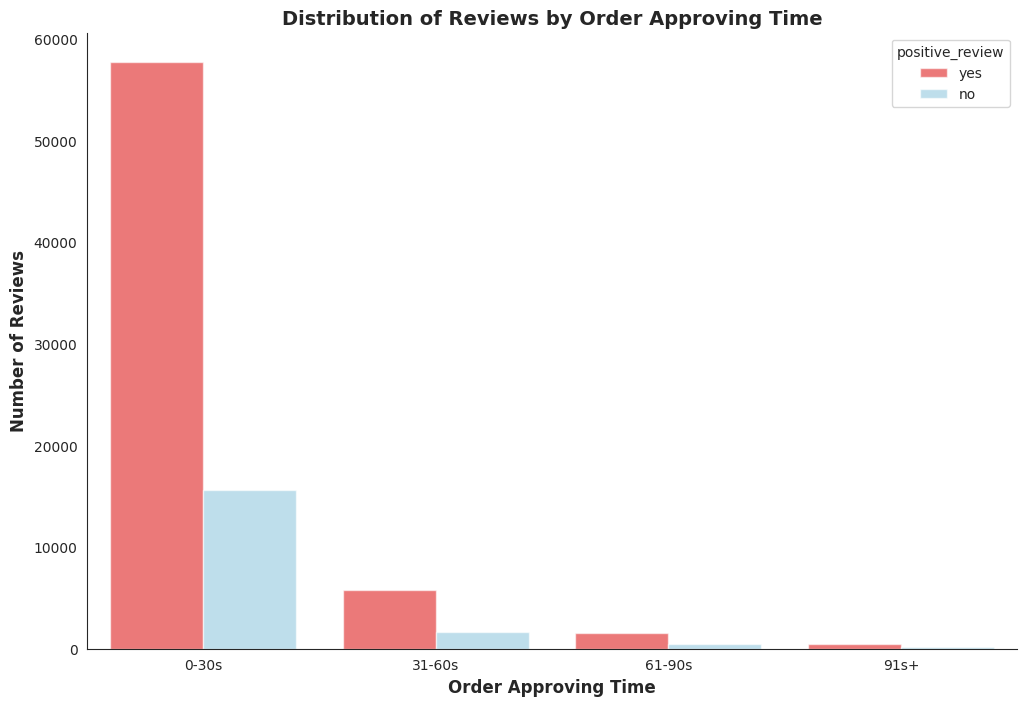

In [88]:
# Replace 0 and 1 in 'positive_review' with 'no' and 'yes'
df['positive_review'] = df['positive_review'].replace({0: 'no', 1: 'yes'})

# Plot the countplot
sns.set_style('white')
plt.figure(figsize=(12, 8))
sns.countplot(
    x='order_approving_time_group',
    hue='positive_review',
    data=df,
    palette=["r", "skyblue"],
    alpha=0.6
)

# Final styling
plt.ylabel("Number of Reviews", fontsize=12, fontweight="semibold")
plt.xlabel("Order Approving Time", fontsize=12, fontweight="semibold")
plt.title("Distribution of Reviews by Order Approving Time", fontsize=14, fontweight="semibold")
sns.despine()
plt.show()

Finding for Order Approving Time: The quicker an order is approved, the more likely customers are to leave a positive review score.

In [89]:
# Ensure 'delivery_time' is numeric
df['delivery_time'] = pd.to_numeric(df['delivery_time'], errors='coerce')

# Define the bins and labels for grouping
bins = [0, 7, 14, 21, 31, 40, 50, 60, float('inf')]
labels = ['0-7days', '8-14days', '15-21days', '22-31days',
          '32-40days','41-50days', '51-60days', '61days+']

# Create a new column for groups
df['delivery_time_group'] = pd.cut(df['delivery_time'], bins=bins, labels=labels, right=True)

# Display the result
grouped_df = df[['delivery_time', 'delivery_time_group']].head()
grouped_df

,delivery_time,delivery_time_group
0,7,0-7days
1,16,15-21days
2,7,0-7days
3,6,0-7days
4,25,22-31days


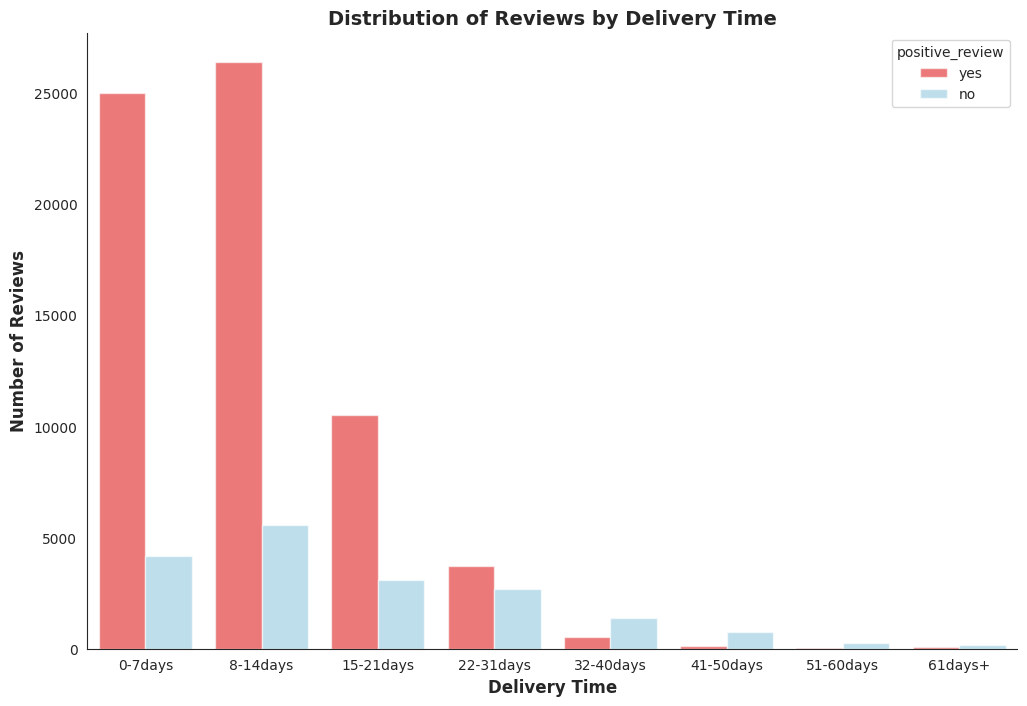

In [90]:
# Replace 0 and 1 in 'positive_review' with 'no' and 'yes'
df['positive_review'] = df['positive_review'].replace({0: 'no', 1: 'yes'})

# Plot the countplot
sns.set_style('white')
plt.figure(figsize=(12, 8))
sns.countplot(
    x='delivery_time_group',
    hue='positive_review',
    data=df,
    palette=["r", "skyblue"],
    alpha=0.6
)

# Final styling
plt.ylabel("Number of Reviews", fontsize=12, fontweight="semibold")
plt.xlabel("Delivery Time", fontsize=12, fontweight="semibold")
plt.title("Distribution of Reviews by Delivery Time", fontsize=14, fontweight="semibold")
sns.despine()
plt.show()

**Finding for Delivery Time:** The earlier the delivery time, the more likely customers are to leave a positive review score.

In [91]:
# Ensure 'delivery_date_diff' is numeric
df['delivery_date_diff'] = pd.to_numeric(df['delivery_date_diff'], errors='coerce')

# Define the bins and labels for grouping
bins = [-150, -120, -30, -14, 14, 30, 120, 121, float('inf')]
labels = ['pull in 120+days', 'pull in 60-120days', 'pull in 15-30days', 'pull in 0-14days',
          'push out 14days','push out 15-30days', 'push out 60-120days', 'push out 120+days']

# Create a new column for groups
df['delivery_date_diff_group'] = pd.cut(df['delivery_date_diff'], bins=bins, labels=labels, right=True)

# Display the result
grouped_df = df[['delivery_date_diff', 'delivery_date_diff_group']].head()
grouped_df

,delivery_date_diff,delivery_date_diff_group
0,-9,pull in 0-14days
1,-3,pull in 0-14days
2,-14,pull in 15-30days
3,-6,pull in 0-14days
4,-16,pull in 15-30days


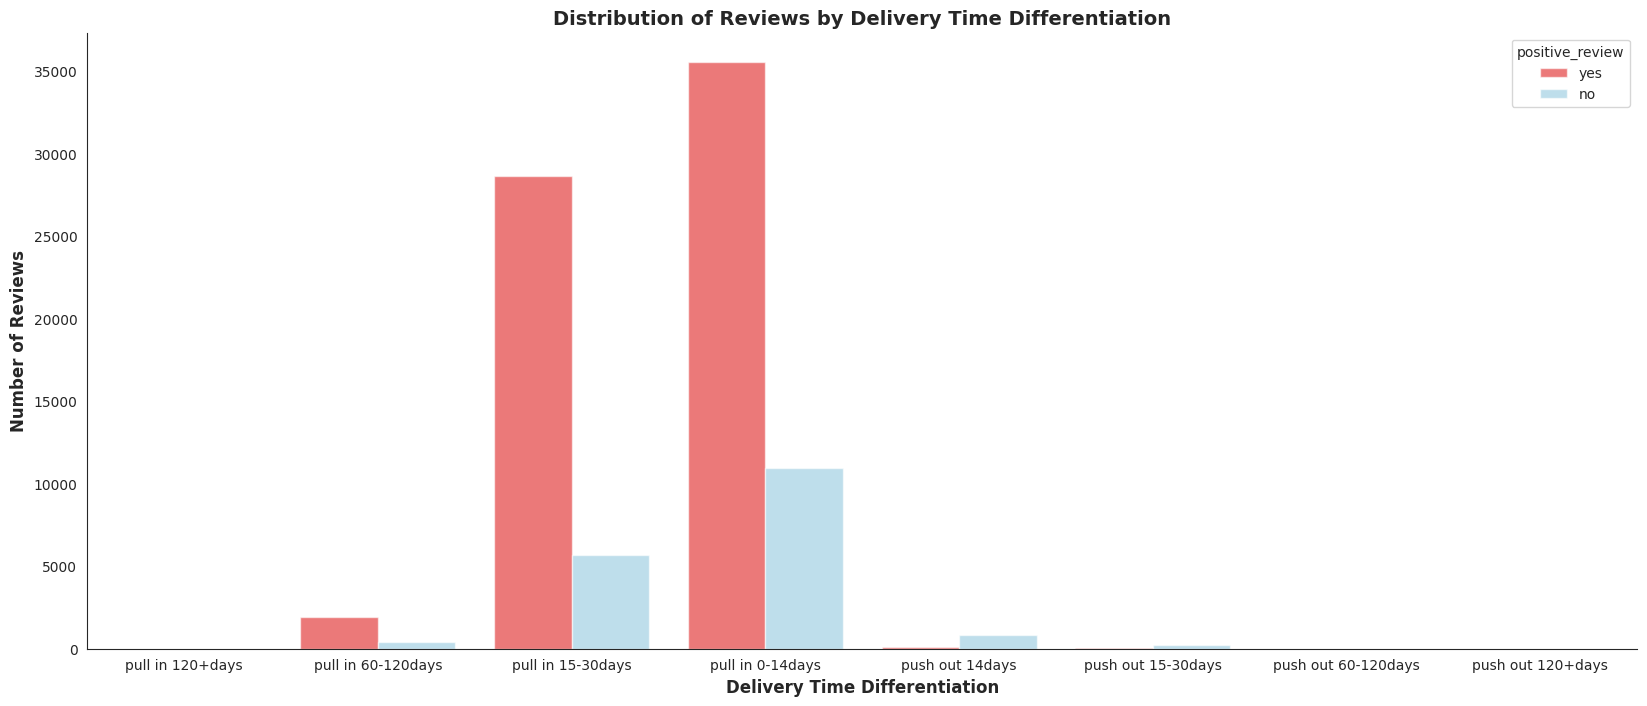

In [92]:
# Replace 0 and 1 in 'positive_review' with 'no' and 'yes'
df['positive_review'] = df['positive_review'].replace({0: 'no', 1: 'yes'})

# Plot the countplot
sns.set_style('white')
plt.figure(figsize=(20, 8))
sns.countplot(
    x='delivery_date_diff_group',
    hue='positive_review',
    data=df,
    palette=["r", "skyblue"],
    alpha=0.6
)

# Final styling
plt.ylabel("Number of Reviews", fontsize=12, fontweight="semibold")
plt.xlabel("Delivery Time Differentiation", fontsize=12, fontweight="semibold")
plt.title("Distribution of Reviews by Delivery Time Differentiation", fontsize=14, fontweight="semibold")
sns.despine()
plt.show()

Finding for differentiation between expected and actual delivery time: "pull in" indicates early delivery, while "push out" reflects late delivery.


1.  Positive Reviews (red bars): The majority of positive reviews are associated with deliveries that were expedited, particularly in the "pull in 0-14 days" and "pull in 15-30 days" categories.
2.   Negative Reviews (blue bars): Negative reviews are more prominent when delivery is delayed, as shown in the "push out 14+ days" categories.

#5. **Data Modeling**
**5.1 Gradient Boosting Decision Trees (GBDT)**:
GBDT is particularly effective for structured datasets, as it captures complex relationships and delivers high predictive performance, especially in scenarios involving imbalanced data



In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from scipy.stats import skew
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

In [20]:
import pandas as pd
import numpy as np
df = pd.read_csv('Finalcleaned_df.csv')

# Rename column
df.rename(columns={'product_description_lenght': 'product_description_length'}, inplace=True)

df.head()

,Unnamed: 0,customer_unique_id,customer_zip_code_prefix,review_score,product_description_length,product_photos_qty,seller_id,price,freight_value,payment_value,...,product_category_name_seguros_e_servicos,product_category_name_sinalizacao_e_seguranca,product_category_name_tablets_impressao_imagem,product_category_name_telefonia,product_category_name_telefonia_fixa,product_category_name_utilidades_domesticas,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,0,861eff4711a542e4b93843c6dd7febb0,14409,4,1141.0,1.0,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,146.87,...,0,0,0,0,0,0,0,1,0,0
1,1,060e732b5b29e8181a18229c7b0b2b5e,1151,5,955.0,1.0,7c67e1448b00f6e969d365cea6b010ab,139.94,17.79,157.73,...,0,0,0,0,0,0,0,1,0,0
2,2,259dac757896d24d7702b9acbbff3f3c,8775,5,1066.0,1.0,7c67e1448b00f6e969d365cea6b010ab,149.94,23.36,173.30,...,0,0,0,0,0,0,0,1,0,0
3,3,345ecd01c38d18a9036ed96c73b8d066,13056,5,407.0,1.0,4a3ca9315b744ce9f8e9374361493884,230.00,22.25,252.25,...,0,0,0,0,0,0,0,1,0,0
4,4,4c93744516667ad3b8f1fb645a3116a4,89254,5,282.0,2.0,8f2ce03f928b567e3d56181ae20ae952,259.90,22.31,282.21,...,0,0,0,0,0,0,0,0,1,0


In [21]:
# Frequency Encoding for customer_unique_id and seller_id
customer_unique_id_freq = df['customer_unique_id'].value_counts().to_dict()
seller_freq = df['seller_id'].value_counts().to_dict()

# Delete original impacted column name
df.drop(columns=['customer_unique_id', 'seller_id'], inplace=True)

In [22]:
# Define Features (X) and Target (y)
X_values = df.drop(columns=['review_score', 'positive_review'])  # Features
y_values = df['positive_review']  # Target variable

# split data into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_values, y_values, test_size=0.2, random_state=42)

# print the shapes to check everything is OK
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(67554, 115)
(16889, 115)
(67554,)
(16889,)


In [23]:
from sklearn.ensemble import GradientBoostingClassifier as GBDT
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Initialize and fit the model
GBDT_algo = GBDT()
GBDT_model = GBDT_algo.fit(X_train, y_train)  # Fix the space in y_train

# Define model list and names
models = [GBDT_model]
names = ['GBDT']

for i in range(len(models)):
    print(f"Model: {names[i]}")

    # Predict based on training data
    predict = models[i].predict(X_train)

    # Calculate Accuracy
    accuracy = accuracy_score(y_train, predict)
    print(f"Accuracy: {accuracy}")

    # Calculate precision, recall, and F1-score
    precision, recall, f1_score, _ = precision_recall_fscore_support(
        y_train, predict, average='macro'
    )
    print(f"Macro Precision: {precision}")
    print(f"Macro Recall: {recall}")
    print(f"Macro F1-score: {f1_score}")
    print("\n")

Model: GBDT
Accuracy: 0.8219794534742576
Macro Precision: 0.8159938679338165
Macro Recall: 0.6069375610886469
Macro F1-score: 0.6266606013344177




In [24]:
from sklearn.ensemble import GradientBoostingClassifier as GBDT
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Initialize and fit the model
GBDT_algo = GBDT()
GBDT_model = GBDT_algo.fit(X_train, y_train)  # Fix the space in y_train

# Define model list and names
models = [GBDT_model]
names = ['GBDT']

for i in range(len(models)):
    print(f"Model: {names[i]}")

    # Predict based on training data
    predict = models[i].predict(X_train)

    # Calculate Accuracy
    accuracy = accuracy_score(y_train, predict)
    print(f"Accuracy: {accuracy}")

    # Calculate precision, recall, and F1-score
    precision, recall, f1_score, _ = precision_recall_fscore_support(
        y_train, predict, average='macro'
    )
    print(f"Macro Precision: {precision}")
    print(f"Macro Recall: {recall}")
    print(f"Macro F1-score: {f1_score}")
    print("\n")

Model: GBDT
Accuracy: 0.8219794534742576
Macro Precision: 0.8159938679338165
Macro Recall: 0.6069375610886469
Macro F1-score: 0.6266606013344177




In [100]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# we get a load of warnings running the code so will supress them
import warnings
warnings.filterwarnings("ignore")

# create a hyperparameter search function for re-usability
def random_search(algo, hyperparameters, X_train, Y_train):
  # do the search using 5 folds/chunks
  clf = RandomizedSearchCV(algo, hyperparameters, cv=5, random_state=2015,
                          scoring='precision_macro', n_iter=20, refit=True)

  # pass the data to fit/train
  clf.fit(X_train, y_train)

  return clf.best_params_


# GBDT
GBDT_tuned_parameters = {
    'n_estimators': randint(25, 250), # Draw from a uniform distribution between 50 and 500
    'learning_rate': uniform(loc=0.01, scale=4.99),  # Draw from a uniform distribution between 0.01 and 5
    'criterion': ['friedman_mse', 'squared_error'],
    'max_depth': randint(2, 7)  # Draw from a uniform distribution between 2 and 7
}

GBDT_best_params = random_search(GBDT_algo, GBDT_tuned_parameters, X_train, y_train)



GBDT_algo = GBDT(**GBDT_best_params)
GBDT_model = GBDT_algo.fit(X_train, y_train)


# Score the models
models = [GBDT_model]
names = ['GBDT']

for i in range(len(models)):
    print(f"Model: {names[i]}")

    # Predict based on training data
    predict = models[i].predict(X_train)

    # Calculate precision, recall, and F1-score
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_train, predict, average='macro')
    print(f"Macro Precision: {precision}")
    print(f"Macro Recall: {recall}")
    print(f"Macro F1-score: {f1_score}")
    print("\n")

Model: GBDT
Macro Precision: 0.80878518633303
Macro Recall: 0.6074279457255876
Macro F1-score: 0.6273049014172747




GBDT Confusion Matrix


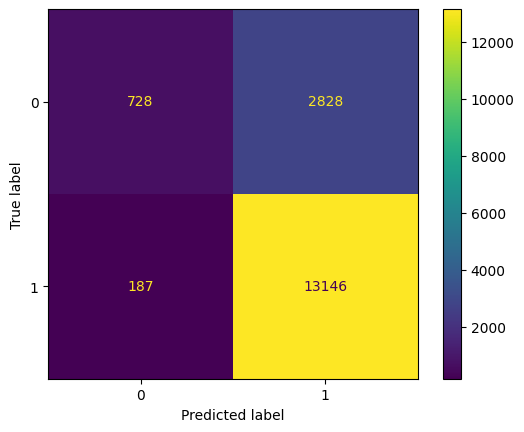

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay as CM

# GBDT
print("GBDT Confusion Matrix")
predict = GBDT_model.predict(X_test)
print(CM.from_predictions(y_test, predict))

Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.20      0.33      3556
           1       0.82      0.99      0.90     13333

    accuracy                           0.82     16889
   macro avg       0.81      0.60      0.61     16889
weighted avg       0.82      0.82      0.78     16889



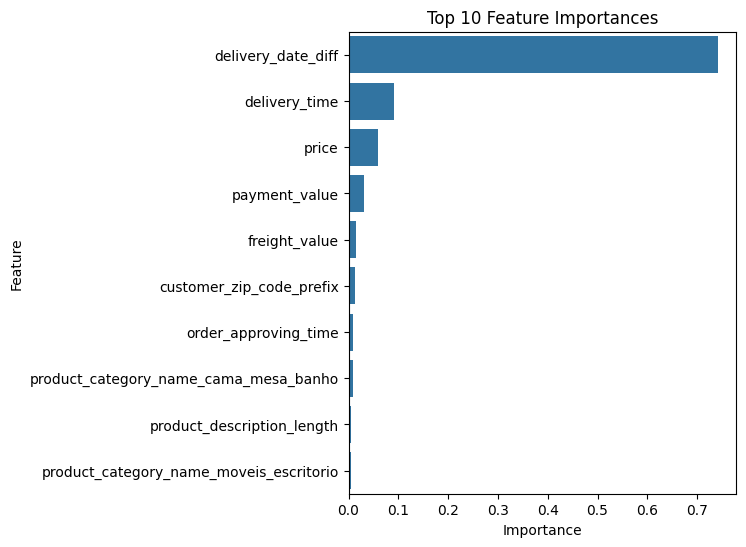

In [26]:
from sklearn.metrics import classification_report
#Getting the classification report to see the precision for each class
print("Classification Report:\n")
print(classification_report(y_test, GBDT_model.predict(X_test)))

#Finding the most important feature in our model
importances = GBDT_model.feature_importances_
features = X_test.columns

feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Only keep the top 10 important features
top_features = feature_importances.head(10)

plt.figure(figsize=(5, 6))
sns.barplot(x=top_features['Importance'], y=top_features['Feature'])
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

**5.2 Extreme Gradient Boosting (XGBoost)**:
XGBoost can deal with the bias-variance tradeoff more carefully, which decreases the training time of the model.

In [45]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
import pandas as pd
import numpy as np
df = pd.read_csv('Finalcleaned_df.csv')

# Rename column
df.rename(columns={'product_description_lenght': 'product_description_length'}, inplace=True)

df.head()

,Unnamed: 0,customer_unique_id,customer_zip_code_prefix,review_score,product_description_length,product_photos_qty,seller_id,price,freight_value,payment_value,...,product_category_name_seguros_e_servicos,product_category_name_sinalizacao_e_seguranca,product_category_name_tablets_impressao_imagem,product_category_name_telefonia,product_category_name_telefonia_fixa,product_category_name_utilidades_domesticas,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,0,861eff4711a542e4b93843c6dd7febb0,14409,4,1141.0,1.0,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,146.87,...,0,0,0,0,0,0,0,1,0,0
1,1,060e732b5b29e8181a18229c7b0b2b5e,1151,5,955.0,1.0,7c67e1448b00f6e969d365cea6b010ab,139.94,17.79,157.73,...,0,0,0,0,0,0,0,1,0,0
2,2,259dac757896d24d7702b9acbbff3f3c,8775,5,1066.0,1.0,7c67e1448b00f6e969d365cea6b010ab,149.94,23.36,173.30,...,0,0,0,0,0,0,0,1,0,0
3,3,345ecd01c38d18a9036ed96c73b8d066,13056,5,407.0,1.0,4a3ca9315b744ce9f8e9374361493884,230.00,22.25,252.25,...,0,0,0,0,0,0,0,1,0,0
4,4,4c93744516667ad3b8f1fb645a3116a4,89254,5,282.0,2.0,8f2ce03f928b567e3d56181ae20ae952,259.90,22.31,282.21,...,0,0,0,0,0,0,0,0,1,0


In [47]:
# Frequency Encoding for customer_unique_id and seller_id
customer_unique_id_freq = df['customer_unique_id'].value_counts().to_dict()
seller_freq = df['seller_id'].value_counts().to_dict()

# Delete original impacted column name
df.drop(columns=['customer_unique_id', 'seller_id'], inplace=True)

In [48]:
# Define Features (X) and Target (Y)
X = df.drop(columns=['review_score', 'positive_review'], axis=1)
Y = df['positive_review']

# Split Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=4567)

# Printing the shape of the testing and training data
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(67554, 115)
(16889, 115)
(67554,)
(16889,)


In [49]:
# XGBoost Model
xgb_model = xgb.XGBClassifier(random_state=4567)

# Train the XGBoost Model
xgb_model.fit(X_train, Y_train)

# Define model list and names
models = [xgb_model]
names = ['XGBoost']

# Training data metrics
for i in range(len(models)):
    print(f"Model: {names[i]}")

    # Predict based on training data
    predict = models[i].predict(X_train)

    # Calculate Accuracy
    accuracy = accuracy_score(Y_train, predict)
    print(f"Accuracy: {accuracy}")

    # Calculate precision, recall, and F1-score
    precision, recall, f1_score, _ = precision_recall_fscore_support(
        Y_train, predict, average='macro'
    )
    print(f"Macro Precision: {precision}")
    print(f"Macro Recall: {recall}")
    print(f"Macro F1-score: {f1_score}")
    print("\n")

Model: XGBoost
Accuracy: 0.8416970127601623
Macro Precision: 0.8590642005448652
Macro Recall: 0.6457509994827157
Macro F1-score: 0.6790235531320246




In [50]:
# Testing data metrics
for i in range(len(models)):
    print(f"Model: {names[i]}")

    # Predict based on testing data
    predict = models[i].predict(X_test)

    # Calculate Accuracy
    accuracy = accuracy_score(Y_test, predict)
    print(f"Accuracy: {accuracy}")

    # Calculate precision, recall, and F1-score
    precision, recall, f1_score, _ = precision_recall_fscore_support(
        Y_test, predict, average='macro'
    )
    print(f"Macro Precision: {precision}")
    print(f"Macro Recall: {recall}")
    print(f"Macro F1-score: {f1_score}")
    print("\n")

Model: XGBoost
Accuracy: 0.8149683225768252
Macro Precision: 0.7724951038070529
Macro Recall: 0.6045704930609965
Macro F1-score: 0.6227201520953589




In [51]:
# Hyperparameter tuning for XGBoost
tuned_parameters = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(3, 20),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.5, 1.0),
    'colsample_bytree': uniform(0.5, 1.0)
}

# Specify recall based on class 1
score = 'recall'  # Defaults to class 1 for binary classification

print(f"Tuning hyperparameters for {score}")
print("\n")

Tuning hyperparameters for recall




In [52]:
# Perform the search using 5-fold cross-validation
clf = RandomizedSearchCV(
    xgb.XGBClassifier(random_state=1984),
    param_distributions=tuned_parameters,
    cv=5,
    random_state=1984,
    scoring=score,
    n_iter=20,
    refit=True
)

# Pass the data to fit/train
clf.fit(X_train, Y_train)

# Get best hyperparameters
best_params = clf.best_params_
print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'colsample_bytree': 0.6904836877999263, 'learning_rate': 0.06683878863677384, 'max_depth': 13, 'n_estimators': 64, 'subsample': 0.6282989088176049}


In [53]:
# Train the model with best parameters
xgb_model = xgb.XGBClassifier(**best_params, random_state=1984)
xgb_model.fit(X_train, Y_train)

# Predict the test data
predict = xgb_model.predict(X_test)

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, predict, average=None)

# Print precision, recall, and F1 for both classes
print(f"Class 0 Precision: {precision[0]}")
print(f"Class 0 Recall: {recall[0]}")
print(f"Class 0 F1-score: {f1_score[0]}")
print("\n")
print(f"Class 1 Precision: {precision[1]}")
print(f"Class 1 Recall: {recall[1]}")
print(f"Class 1 F1-score: {f1_score[1]}")

Class 0 Precision: 0.7859960552268245
Class 0 Recall: 0.218236582694414
Class 0 F1-score: 0.3416202314616374


Class 1 Precision: 0.8201574803149606
Class 1 Recall: 0.9836065573770492
Class 1 F1-score: 0.8944765045342127


XGBoost Confusion Matrix
Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.22      0.34      3652
           1       0.82      0.98      0.89     13237

    accuracy                           0.82     16889
   macro avg       0.80      0.60      0.62     16889
weighted avg       0.81      0.82      0.77     16889



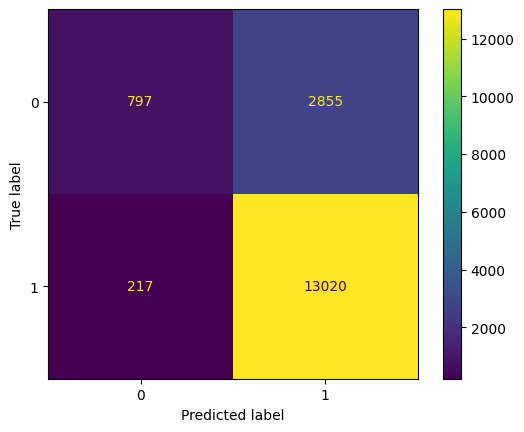

In [54]:
# Confusion Matrix for XGBoost
print("XGBoost Confusion Matrix")
ConfusionMatrixDisplay.from_predictions(Y_test, predict)

# Classification Report for XGBoost
from sklearn.metrics import classification_report
print("Classification Report:\n")
print(classification_report(Y_test, xgb_model.predict(X_test)))

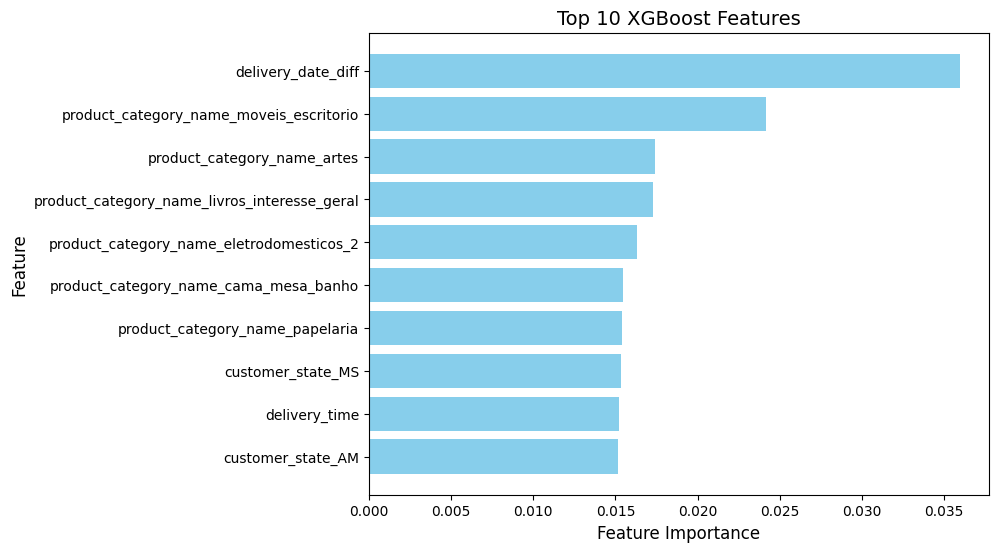

In [55]:
# 1. Feature Importance Analysis
# Extract Feature Importance
feature_importances = xgb_model.feature_importances_
feature_names = X_train.columns  # Replace with your actual feature names

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Select top 10 features
top_features = importance_df.head(10)

# Plot Feature Importance
plt.figure(figsize=(8, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 10 XGBoost Features', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.show()

**5.3 Random Forest**:
Random Forest provides a more resource-efficient solution while maintaining robust accuracy

In [27]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import warnings
warnings.filterwarnings("ignore")

In [37]:
# Define Features (X) and Target (Y)
X_values = df.drop(columns=['review_score', 'positive_review'])  # Features
y_values = df['positive_review']  # Target variable

# split data into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_values, Y_values, test_size=0.2, random_state=42)

# print the shapes to check everything is OK
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(67554, 115)
(16889, 115)
(67554,)
(16889,)


In [38]:
# Train Random Forest model
RF_algo = RF()
RF_model = RF_algo.fit(X_train, Y_train)

# Define model list and names for training evaluation
models = [RF_model]
names = ['RF']

# Training data evaluation
for i in range(len(models)):
    print(f"Model: {names[i]}")

    # Predict based on training data
    predict = models[i].predict(X_train)

    # Calculate Accuracy
    accuracy = accuracy_score(Y_train, predict)
    print(f"Accuracy: {accuracy}")

    # Calculate precision, recall, and F1-score
    precision, recall, f1_score, _ = precision_recall_fscore_support(
        Y_train, predict, average='macro'
    )
    print(f"Macro Precision: {precision}")
    print(f"Macro Recall: {recall}")
    print(f"Macro F1-score: {f1_score}")
    print("\n")

Model: RF
Accuracy: 0.9999851970275632
Macro Precision: 0.9999905628326602
Macro Recall: 0.9999656899746105
Macro F1-score: 0.9999781257704958




In [41]:
# Testing data evaluation
for i in range(len(models)):
    print(f"Model: {names[i]}")

    # Predict based on testing data
    predict = models[i].predict(X_test)

    # Calculate Accuracy
    accuracy = accuracy_score(Y_test, predict)
    print(f"Accuracy: {accuracy}")

    # Calculate precision, recall, and F1-score
    precision, recall, f1_score, _ = precision_recall_fscore_support(
        Y_test, predict, average='macro'
    )
    print(f"Macro Precision: {precision}")
    print(f"Macro Recall: {recall}")
    print(f"Macro F1-score: {f1_score}")
    print("\n")

Model: RF
Accuracy: 0.8204748652969388
Macro Precision: 0.8008295057517112
Macro Recall: 0.5951244394158223
Macro F1-score: 0.6110389679836835




In [42]:
# Define hyperparameter search space
tuned_parameters = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None]
}

# Specify recall as the scoring metric
score = 'recall'

print(f"Tuning hyperparameters for {score}")
print("\n")

# Perform the search using 5-fold cross-validation
clf = RandomizedSearchCV(
    RF(random_state=1984),
    param_distributions=tuned_parameters,
    cv=5,
    random_state=1984,
    scoring=score,
    n_iter=20,
    refit=True
)

# Fit the model
clf.fit(X_train, Y_train)
print("Best Hyperparameters:\n", clf.best_params_)

Tuning hyperparameters for recall


Best Hyperparameters:
 {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 13, 'n_estimators': 290}


In [44]:
# Train the final model with the best parameters
RF_algo = RF(**clf.best_params_, random_state=1984)
RF_model = RF_algo.fit(X_train, Y_train)

# Evaluate final model
predict = RF_model.predict(X_test)

# Calculate precision, recall, and F1-score for each class
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, predict, average=None)

print(f"Class 0 Precision: {precision[0]}")
print(f"Class 0 Recall: {recall[0]}")
print(f"Class 0 F1-score: {f1_score[0]}")
print("\n")
print(f"Class 1 Precision: {precision[1]}")
print(f"Class 1 Recall: {recall[1]}")
print(f"Class 1 F1-score: {f1_score[1]}")

Class 0 Precision: 0.0
Class 0 Recall: 0.0
Class 0 F1-score: 0.0


Class 1 Precision: 0.7894487536266209
Class 1 Recall: 1.0
Class 1 F1-score: 0.8823373701277215


Confusion Matrix:


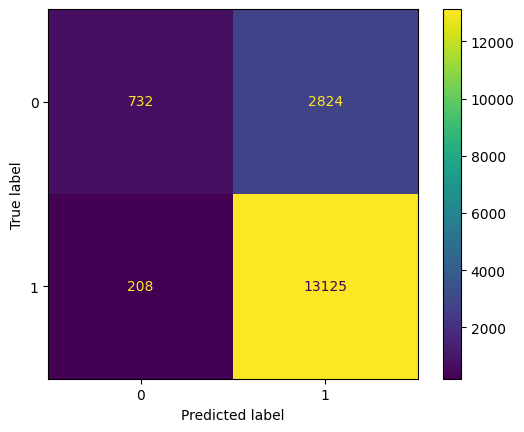

Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.21      0.33      3556
           1       0.82      0.98      0.90     13333

    accuracy                           0.82     16889
   macro avg       0.80      0.60      0.61     16889
weighted avg       0.81      0.82      0.78     16889



In [39]:
# Confusion Matrix
print("Confusion Matrix:")
ConfusionMatrixDisplay.from_predictions(Y_test, RF_model.predict(X_test))
plt.show()

# Classification Report
from sklearn.metrics import classification_report
print("Classification Report:\n")
print(classification_report(Y_test, RF_model.predict(X_test)))

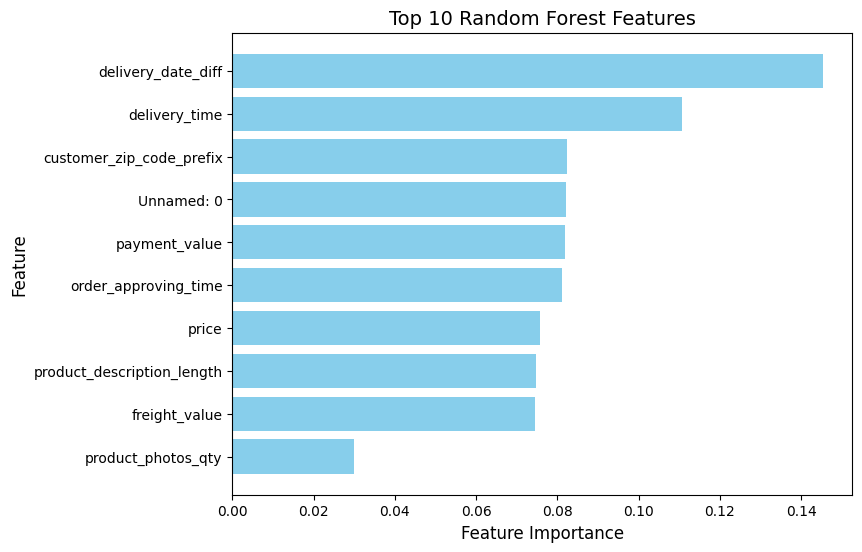

In [43]:
# Extract Feature Importance
feature_importances = RF_algo.feature_importances_
feature_names = X_train.columns

# Create DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Select top 10 features
top_features = importance_df.head(10)

# Plot Feature Importance
plt.figure(figsize=(8, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 10 Random Forest Features', fontsize=14)
plt.gca().invert_yaxis()
plt.show()

# 6. Modelling Selection:
GBDT is better suited for applications prioritising accurately identifying positive instances (Class 1) due to its higher recall and F1-Score and ability to minimise false negatives effectively.